In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

## load data

In [2]:
local_path_ubu = '/home/jwzhang411898961/Dropbox/DataScience/Kaggle/Titanic_Machine Learning from Disaster/'
train = pd.read_csv(local_path_ubu + 'train.csv')
test = pd.read_csv(local_path_ubu + 'test.csv')
IDtest = test["PassengerId"]
# train['Embarked'].value_counts()

## remove the outliers

In [3]:
def detect_outliers(df,n,features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices) # will be a dict: e.g. Counter({27: 3, 88: 3, 159: 3})
    multiple_outliers = list(k for k, v in outlier_indices.items() if v>n)
    return multiple_outliers
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"]) # [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [4]:
train.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [5]:
train = train.drop(Outliers_to_drop, axis=0).reset_index(drop=True)

## link training and test dataset

In [6]:
train_len = len(train)
dataset = pd.concat([train, test], axis=0).reset_index(drop=True)
dataset.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1294,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1295,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1296,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1297,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1298,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


## look for nan values

In [7]:
dataset.isnull().sum()

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [10]:
train.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
861,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
862,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
863,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
864,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
865,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
866,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
867,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
868,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
869,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
870,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


## feature analysis and data preprocess

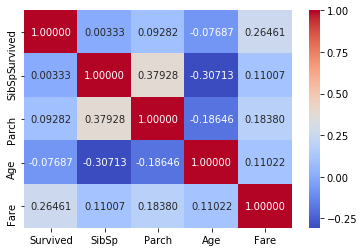

In [11]:
# f = train[['Survived', 'SibSp', 'Parch']].corr()
# print(f)
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot=True, fmt=".5f", cmap="coolwarm")

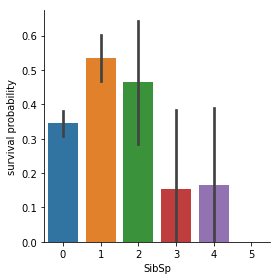

In [12]:
g = sns.factorplot(x="SibSp",y="Survived",data=train,kind="bar")
g = g.set_ylabels("survival probability")

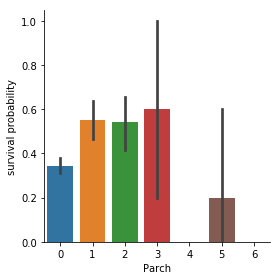

In [13]:
g  = sns.factorplot(x="Parch",y="Survived",data=train,kind="bar")
g = g.set_ylabels("survival probability")

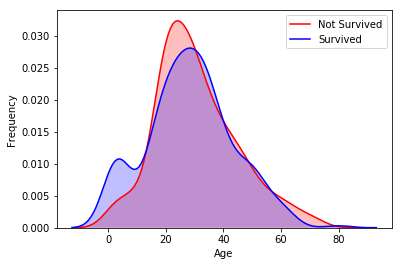

In [14]:
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], color="Red", shade=True) ## 1d kernel distribution 
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

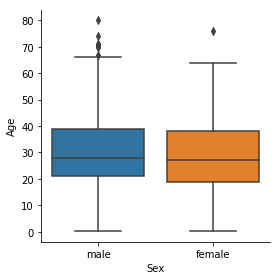

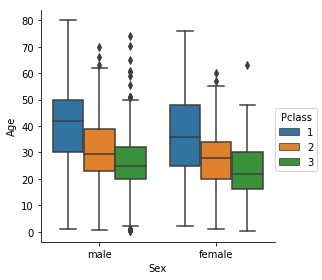

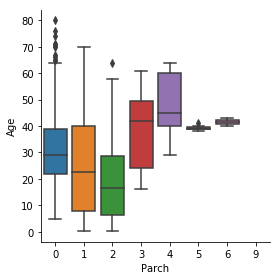

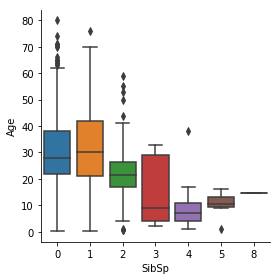

In [15]:
# Explore Age vs Sex, Parch , Pclass and SibSP
g = sns.factorplot(y="Age",x="Sex",data=dataset,kind="box")
g = sns.factorplot(y="Age",x="Sex",hue="Pclass", data=dataset,kind="box")
g = sns.factorplot(y="Age",x="Parch", data=dataset,kind="box")
g = sns.factorplot(y="Age",x="SibSp", data=dataset,kind="box")

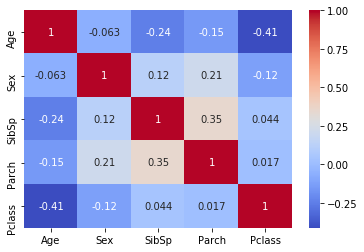

In [16]:
## convert Sex into categorical value 0 for male and 1 for female

dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})
dataset.tail(50)

# def SexCoter(x):
#     if x == "male":
#         return 0
#     elif x == "female":
#         return 1
# dataset["Sex"] = dataset["Sex"].apply(SexCoter)
# dataset["Sex"].value_counts()
# dataset.tail(50)

g = sns.heatmap(dataset[["Age","Sex","SibSp","Parch","Pclass"]].corr(),cmap="coolwarm",annot=True)

In [17]:
# Filling missing value of Age 

## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows

index_NaN_age = list(dataset["Age"][dataset["Age"].isnull()].index)

for i in index_NaN_age:
    age_med = dataset["Age"].median()
    age_pred = dataset["Age"][((dataset["SibSp"] == dataset["SibSp"].iloc[i]) & 
                               (dataset["Parch"] == dataset["Parch"].iloc[i]) & 
                               (dataset["Pclass"] == dataset["Pclass"].iloc[i]))].median()
    if not np.isnan(age_pred):
        dataset["Age"].iloc[i] = age_pred
    else:
        dataset["Age"].iloc[i] = age_med
dataset.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1294,25.0,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,0,0,NaN,A.5. 3236
1295,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,1,0,NaN,PC 17758
1296,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,0,0,NaN,SOTON/O.Q. 3101262
1297,25.0,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,0,0,NaN,359309
1298,16.0,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,0,1,NaN,2668


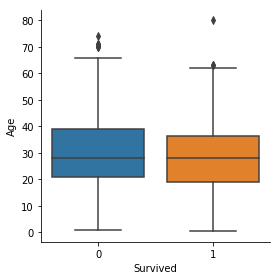

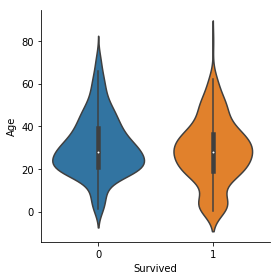

In [18]:
g = sns.factorplot(x="Survived", y="Age", data=train, kind="box")
g = sns.factorplot(x="Survived", y="Age", data=train, kind="violin")

## Explore Fare distribution

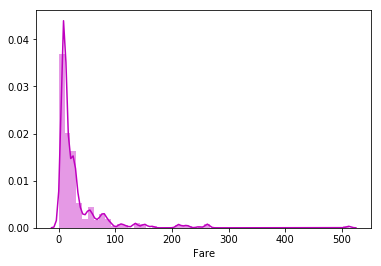

In [19]:
#Fill Fare missing values with the median value
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

g = sns.distplot(dataset["Fare"], color="m")
g = g.legend(loc="best")

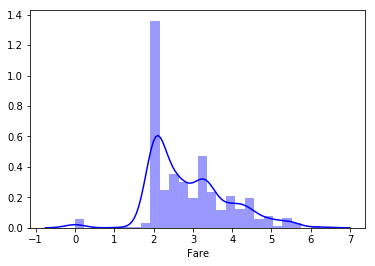

In [20]:
# Apply log to Fare to reduce skewness distribution
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
g = sns.distplot(dataset["Fare"], color="b")
g = g.legend(loc="best")

## Catergorical variables 

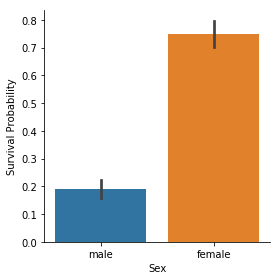

In [21]:
g = sns.factorplot(data=train, x="Sex", y="Survived", kind="bar")
g = g.set_ylabels("Survival Probability")

In [22]:
train[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


### Explore Pclass vs Survived

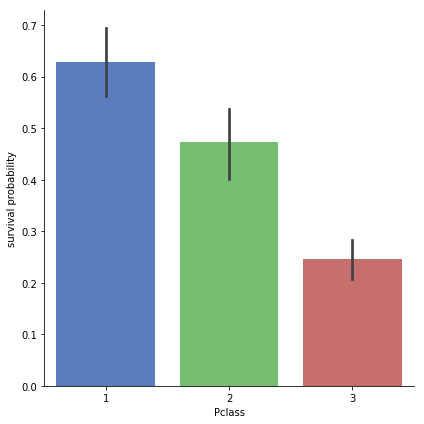

In [23]:
g = sns.factorplot(x="Pclass",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g = g.set_ylabels("survival probability")

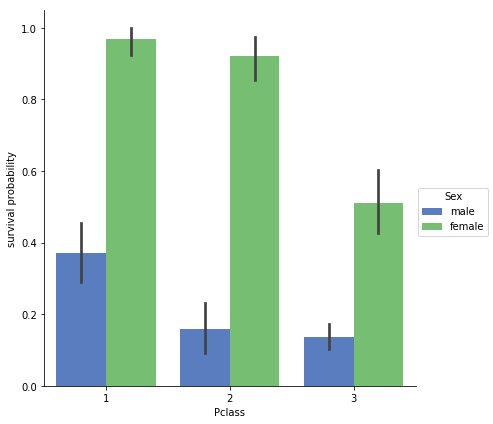

In [24]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train,
                  size=6, kind="bar", palette="muted")
g = g.set_ylabels("survival probability")

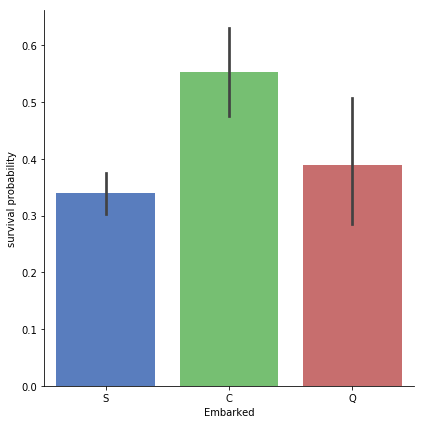

In [25]:
#Fill Embarked nan values of dataset set with 'S' most frequent value
dataset["Embarked"] = dataset["Embarked"].fillna("S")

g = sns.factorplot(x="Embarked", y="Survived",  data=train,
                   size=6, kind="bar", palette="muted")
g = g.set_ylabels("survival probability")

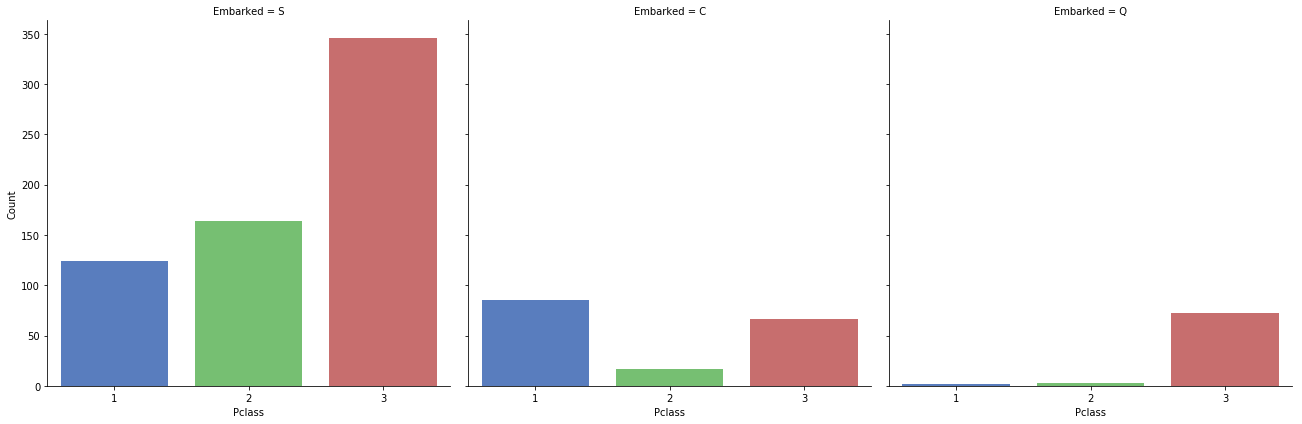

In [26]:
# Explore Pclass vs Embarked 
g = sns.factorplot("Pclass", col="Embarked",  data=train,
                   size=6, kind="count", palette="muted")
g = g.set_ylabels("Count")

## Feature engineering

### name

In [27]:
dataset["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [28]:
# Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]
# print(dataset_title)
dataset["Title"] = pd.Series(dataset_title)
dataset["Title"].head()
dataset["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

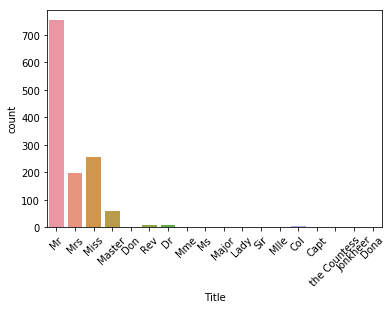

In [29]:
g = sns.countplot(x="Title",data=dataset)
g = plt.setp(g.get_xticklabels(), rotation=45)

In [30]:
dataset["Title"] = dataset["Title"].replace(['Don', 'Rev', 'Dr',
       'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], 'Rare')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
dataset["Title"] = dataset["Title"].astype(int)

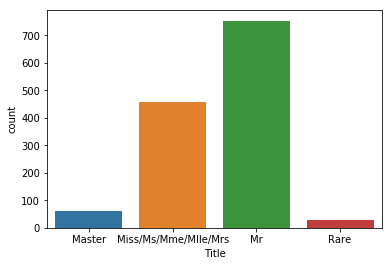

In [31]:
g = sns.countplot(dataset["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

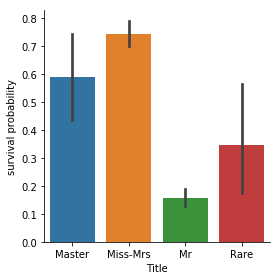

In [32]:
g = sns.factorplot(x="Title",y="Survived",data=dataset[:train_len],kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

In [33]:
# Drop Name variable
dataset.drop(["Name"], axis=1, inplace=True)
# dataset.drop(labels = ["Name"], axis = 1, inplace = True)   #inplace为True时返回None，为默认False时返回dataset

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 12 columns):
Age            1299 non-null float64
Cabin          292 non-null object
Embarked       1299 non-null object
Fare           1299 non-null float64
Parch          1299 non-null int64
PassengerId    1299 non-null int64
Pclass         1299 non-null int64
Sex            1299 non-null int64
SibSp          1299 non-null int64
Survived       881 non-null float64
Ticket         1299 non-null object
Title          1299 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 121.9+ KB


In [35]:
# convert to indicator values Title and Embarked 
Title_dummies = pd.get_dummies(dataset['Title'],prefix='Title')
dataset = dataset.join(Title_dummies).drop(['Title'],axis=1)
#dataset = pd.get_dummies(dataset, columns = ["Title"])
dataset.drop(['Title_3'],axis=1,inplace=True) #这里去掉存活率最低的一列（冗余特征）

### SibSp,Parch

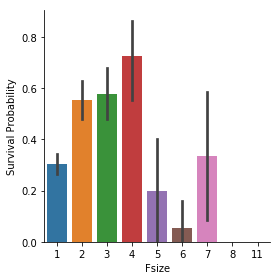

In [36]:
dataset['Fsize'] = dataset['SibSp'] + dataset['Parch'] + 1
g = sns.factorplot(data=dataset, x='Fsize', y='Survived', kind='bar')
g.set_ylabels('Survival Probability')

In [37]:
# Create new feature of family size
dataset['Single'] = dataset['Fsize'].map(lambda s: 1 if s == 1 else 0)
dataset['SnallF'] = dataset['Fsize'].map(lambda s: 1 if s == 2 else 0)
dataset['MedF'] = dataset['Fsize'].map(lambda s: 1 if (s >= 3 and s <= 4) else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s: 1 if s >= 5 else 0)
dataset.tail()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Fsize,Single,SnallF,MedF,LargeF
1294,25.0,NaN,S,2.085672,0,1305,3,0,0,NaN,A.5. 3236,0,0,1,1,1,0,0,0
1295,39.0,C105,C,4.690430,0,1306,1,1,0,NaN,PC 17758,0,0,0,1,1,0,0,0
1296,38.5,NaN,S,1.981001,0,1307,3,0,0,NaN,SOTON/O.Q. 3101262,0,0,1,1,1,0,0,0
1297,25.0,NaN,S,2.085672,0,1308,3,0,0,NaN,359309,0,0,1,1,1,0,0,0
1298,16.0,NaN,C,3.107198,1,1309,3,0,1,NaN,2668,1,0,0,3,0,0,1,0


In [38]:
dataset.drop(['Fsize', 'SibSp', 'Parch'], axis=1, inplace=True)

In [39]:
dataset.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'PassengerId', 'Pclass', 'Sex',
       'Survived', 'Ticket', 'Title_0', 'Title_1', 'Title_2', 'Single',
       'SnallF', 'MedF', 'LargeF'],
      dtype='object')

### Embarked

In [40]:
dataset[:train_len][['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Embarked', ascending=True)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.341195


In [41]:
Embarked_dummies = pd.get_dummies(dataset["Embarked"], prefix='Em')
dataset = dataset.join(Embarked_dummies).drop('Embarked', axis=1)
dataset.drop('Em_S', axis=1, inplace=True)

In [42]:
dataset.columns

Index(['Age', 'Cabin', 'Fare', 'PassengerId', 'Pclass', 'Sex', 'Survived',
       'Ticket', 'Title_0', 'Title_1', 'Title_2', 'Single', 'SnallF', 'MedF',
       'LargeF', 'Em_C', 'Em_Q'],
      dtype='object')

### Cabin

In [43]:
dataset['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [44]:
dataset["Cabin"].describe()

count                 292
unique                186
top       B57 B59 B63 B66
freq                    5
Name: Cabin, dtype: object

In [45]:
dataset["Cabin"].isnull().sum()

1007

In [46]:
dataset["Cabin"][dataset["Cabin"].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

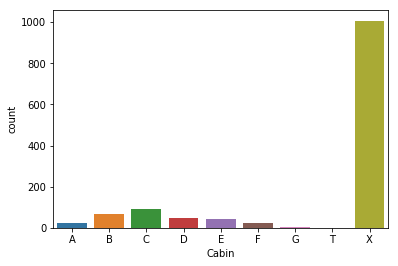

In [47]:
# Replace the Cabin number by the type of cabin 'X' if not
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

g = sns.countplot(dataset["Cabin"],order=['A','B','C','D','E','F','G','T','X'])

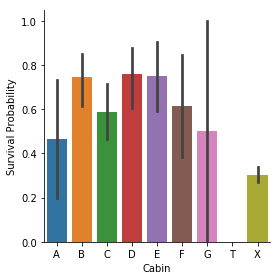

In [48]:
g = sns.factorplot(y="Survived",x="Cabin",data=dataset[:train_len],kind="bar",order=['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels("Survival Probability")

In [49]:
dataset = pd.get_dummies(dataset, columns = ["Cabin"],prefix="Cabin")
dataset.drop(['Cabin_T'],axis=1,inplace=True)

In [50]:
dataset.head()

,Age,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title_0,Title_1,Title_2,...,Em_C,Em_Q,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X
0,22.0,1.981001,1,3,0,0.0,A/5 21171,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,38.0,4.266662,2,1,1,1.0,PC 17599,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,26.0,2.070022,3,3,1,1.0,STON/O2. 3101282,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,3.972177,4,1,1,1.0,113803,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,35.0,2.085672,5,3,0,0.0,373450,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### Ticket

In [51]:
dataset["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [52]:
## Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 

Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
# print(Ticket)
dataset["Ticket"] = Ticket
dataset["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [53]:
dataset[:train_len][['Ticket', 'Survived']].groupby(['Ticket'],as_index=False).mean().sort_values(by='Ticket', ascending=True)

,Ticket,Survived
0,A4,0.000000
1,A5,0.095238
2,AS,0.000000
3,C,0.400000
4,CA,0.411765
5,CASOTON,0.000000
6,FC,0.000000
7,FCC,0.800000
8,Fa,0.000000
9,LINE,0.250000


In [54]:
dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")
dataset.drop(['T_A4'],axis=1,inplace=True)

### Pclass

In [55]:
dataset[:train_len][['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass', ascending=True)

,Pclass,Survived
0,1,0.629108
1,2,0.472826
2,3,0.245868


In [56]:
# Create categorical values for Pclass
dataset["Pclass"] = dataset["Pclass"].astype("category")
dataset = pd.get_dummies(dataset, columns = ["Pclass"],prefix="Pc")
dataset.drop(['Pc_3'],axis=1,inplace=True)

### Age

In [57]:
dataset['Age']=dataset['Age'].astype(int)
dataset['AgeBand'] = pd.cut(dataset['Age'], 5)
dataset[:train_len][['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.532110
1,"(16.0, 32.0]",0.340336
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [58]:
dataset.tail()

,Age,Fare,PassengerId,Sex,Survived,Title_0,Title_1,Title_2,Single,SnallF,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,AgeBand
1294,25,2.085672,1305,0,NaN,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,"(16.0, 32.0]"
1295,39,4.690430,1306,1,NaN,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,"(32.0, 48.0]"
1296,38,1.981001,1307,0,NaN,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,"(32.0, 48.0]"
1297,25,2.085672,1308,0,NaN,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,"(16.0, 32.0]"
1298,16,3.107198,1309,0,NaN,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"(-0.08, 16.0]"


In [59]:
dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 

Age_dummies = pd.get_dummies(dataset['Age'], prefix='Age')
dataset=dataset.join(Age_dummies).drop(['Age','AgeBand'],axis=1)
dataset.drop(['Age_4'],axis=1,inplace=True)

### Fare

In [60]:
dataset['FareBand'] = pd.cut(dataset['Fare'], 4)
dataset[:train_len][['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [61]:
dataset.columns

Index(['Fare', 'PassengerId', 'Sex', 'Survived', 'Title_0', 'Title_1',
       'Title_2', 'Single', 'SnallF', 'MedF', 'LargeF', 'Em_C', 'Em_Q',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_X', 'T_A', 'T_A5', 'T_AQ3', 'T_AQ4', 'T_AS', 'T_C',
       'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_LP', 'T_PC',
       'T_PP', 'T_PPP', 'T_SC', 'T_SCA3', 'T_SCA4', 'T_SCAH', 'T_SCOW',
       'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2',
       'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2', 'T_STONOQ', 'T_SWPP',
       'T_WC', 'T_WEP', 'T_X', 'Pc_1', 'Pc_2', 'Age_0', 'Age_1', 'Age_2',
       'Age_3', 'FareBand'],
      dtype='object')

In [62]:
dataset.loc[ dataset['Fare'] <= 1.56, 'Fare'] = 0
dataset.loc[(dataset['Fare'] > 1.56) & (dataset['Fare'] <= 3.119), 'Fare'] = 1
dataset.loc[(dataset['Fare'] > 3.119) & (dataset['Fare'] <= 4.679), 'Fare']   = 2
dataset.loc[ dataset['Fare'] > 4.679, 'Fare'] = 3
Fare_dummies = pd.get_dummies(dataset['Fare'], prefix='Fare')
dataset = dataset.join(Fare_dummies).drop(['Fare','FareBand'],axis=1)

In [63]:
dataset.columns

Index(['PassengerId', 'Sex', 'Survived', 'Title_0', 'Title_1', 'Title_2',
       'Single', 'SnallF', 'MedF', 'LargeF', 'Em_C', 'Em_Q', 'Cabin_A',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_X', 'T_A', 'T_A5', 'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA',
       'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP',
       'T_PPP', 'T_SC', 'T_SCA3', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS',
       'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ',
       'T_SP', 'T_STONO', 'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP',
       'T_X', 'Pc_1', 'Pc_2', 'Age_0', 'Age_1', 'Age_2', 'Age_3', 'Fare_0.0',
       'Fare_1.0', 'Fare_2.0', 'Fare_3.0'],
      dtype='object')

In [64]:
dataset.drop(['Fare_0.0'],axis=1,inplace=True)

### PassengerID

In [65]:
# Drop useless variables 
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [66]:
dataset.head()

,Sex,Survived,Title_0,Title_1,Title_2,Single,SnallF,MedF,LargeF,Em_C,...,T_X,Pc_1,Pc_2,Age_0,Age_1,Age_2,Age_3,Fare_1.0,Fare_2.0,Fare_3.0
0,0,0.0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,1.0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,1,1.0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,1,1.0,0,1,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,0,0.0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


# Basic Models

In [67]:
## Separate train dataset and test dataset

train = dataset[:train_len]
test = dataset[train_len:]
test.drop(['Survived'], axis=1, inplace=True)

In [68]:
## Separate train features and label 
train['Survived'] = train['Survived'].astype(int)
Y_train = train['Survived']
X_train = train.drop(labels=['Survived'], axis=1)


## 简单模型
1.KNN

2.Logistic regression

3.Naive_bayes

4.SVC

In [69]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, learning_curve
kfold = StratifiedKFold(n_splits=10)

## KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

k_range=list([16,18])
knn_param_grid={'n_neighbors' : k_range}
gridKNN = GridSearchCV(KNeighborsClassifier(),param_grid = knn_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gridKNN.fit(X_train,Y_train)
print(gridKNN.best_estimator_)
print(gridKNN.best_score_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')
0.821793416572


[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.3s finished


## Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

LR_param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
gridLR = GridSearchCV(LogisticRegression(), param_grid=LR_param_grid, cv=kfold, scoring="accuracy", n_jobs=-1, verbose=1)
gridLR.fit(X_train, Y_train)
print(gridLR.best_estimator_)
print(gridLR.best_score_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.822928490352


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.3s finished


## SVM

In [75]:
from sklearn.svm import SVC

#  If we let C→0 then we don’t penalize slack variables at all, 
# and as we increase C , we penalize our slack variables more 
# and more - it’s essentially a tradeoff between penalizing slack variables 
# and obtaining a large margin for our SVM.
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1] 

# When you are using SVM, you are necessarily using one of the kernels: linear, polinomial
# or RBF=Radial Base Function (also called Gaussian Kernel) or ... . 
# The latter is K(x,x') = exp(-gamma * ||x-x'||^2) 
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
SVC_param_grid = {'kernel': kernel, 'C': C, 'gamma': gamma}
gridSVC = GridSearchCV(SVC(), param_grid=SVC_param_grid, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1)
gridSVC.fit(X_train, Y_train)
print(gridSVC.best_estimator_)
print(gridSVC.best_score_)


Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 1456 tasks      | elapsed:    8.5s


SVC(C=0.6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.83314415437


[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:   13.3s finished


## Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB 
GaussianNB=GaussianNB()
GaussianNB.fit(X_train, Y_train)
NB_score=cross_val_score(GaussianNB,X_train,Y_train, cv = kfold,scoring = "accuracy").mean()
print(NB_score)
#不知怎么回事，计算有问题

0.431307456588


## 单一集成模型
1 Random Forest

2 Extra Trees

3 Gradient Boosting

4 xgboost

## Random Forest

In [78]:
# RFC Parameters tunning 
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

rf_param_grid = {'n_estimators': [300, 500],
                 'max_depth': [8, 15],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 5],
                 'max_features': ['log2', 'sqrt']}

gridRFC = GridSearchCV(rf_clf, param_grid=rf_param_grid, cv = 5, scoring="accuracy", n_jobs=-1, verbose=1)
gridRFC.fit(X_train,Y_train)
RFC_best_est = gridRFC.best_estimator_
RFC_best_sco = gridRFC.best_score_
print(RFC_best_est, RFC_best_sco)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   24.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 0.828603859251


In [80]:
test_Survived = pd.Series(RFC_best_est.predict(test), name="Survived")

results_RFC_best = pd.concat([IDtest,test_Survived],axis=1)

results_RFC_best.to_csv("RFC_best.csv",index=False)

## Extra Trees

In [81]:
#ExtraTrees 
from sklearn.ensemble import ExtraTreesClassifier

Ext_clf = ExtraTreesClassifier()

## Search grid for optimal parameters
ex_param_grid = {"max_depth": [8, 15],
              "max_features": ['log2', 'sqrt'],
              "min_samples_split": [2,5, 10],
              "min_samples_leaf": [1, 2, 5],
              "n_estimators" :[300, 500]}

gridEXT = GridSearchCV(Ext_clf,param_grid=ex_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
gridEXT.fit(X_train,Y_train)
EXT_best_est = gridEXT.best_estimator_
EXT_best_sco = gridEXT.best_score_
print(EXT_best_est, EXT_best_sco)



Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   24.5s finished


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=8, max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 0.83200908059


## Gradient boosting

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

GB_clf = GradientBoostingClassifier()

gb_param_grid = {
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [3, 5, 10],
              'min_samples_leaf': [50,100,150],
              'max_features' :['sqrt','log2']
              }
gridGBC = GridSearchCV(GB_clf, param_grid=gb_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
gridGBC.fit(X_train, Y_train)
GBC_best_est = gridGBC.best_estimator_
GBC_best_sco = gridGBC.best_score_
print(GBC_best_est, GBC_best_sco)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False) 0.814982973893


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.8s finished


In [83]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

## Search grid for optimal parameters
xgb_param_grid = {"learning_rate": [0.01,0.5,1.0],
                  "n_estimators" : [300,500],
              "gamma": [0.1, 0.5,1.0],
              "max_depth": [3, 5, 10],
              "min_child_weight": [1, 3],
              "subsample" : [0.8,1.0],
                 "colsample_bytree" : [0.8,1.0]}


gridxgb = GridSearchCV(XGBClassifier(),param_grid = xgb_param_grid, cv=5, scoring="accuracy", n_jobs= -1, verbose = 1)

gridxgb.fit(X_train,Y_train)

gridxgb_best = gridxgb.best_estimator_

# Best score
gridxgb.best_score_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.8min finished


0.82973893303064694

In [84]:
print(gridxgb_best)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=1.0, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=3, missing=None,
       n_estimators=300, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1.0)


In [85]:
test_Survived = pd.Series(gridxgb_best.predict(test), name='Survived')
results_gridxgb = pd.concat([IDtest, test_Survived], axis=1)
results_gridxgb.to_csv('gridxgb.csv', index=False)

## Plot learning curves

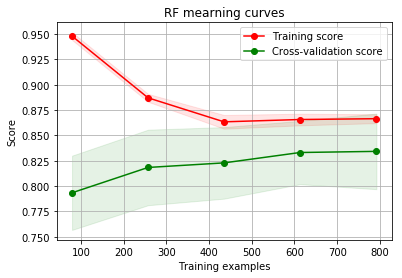

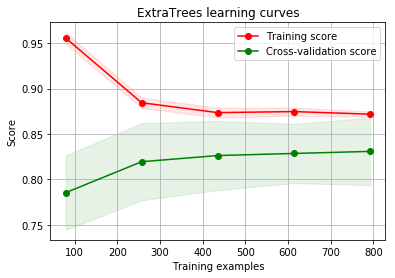

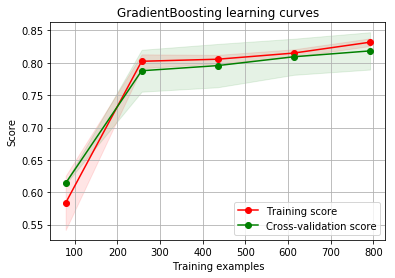

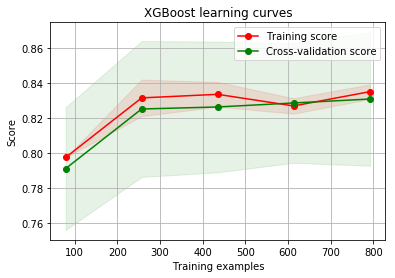

In [86]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gridRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gridEXT.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gridGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gridxgb.best_estimator_,"XGBoost learning curves",X_train,Y_train,cv=kfold)

## Feature importance of tree based classifiers

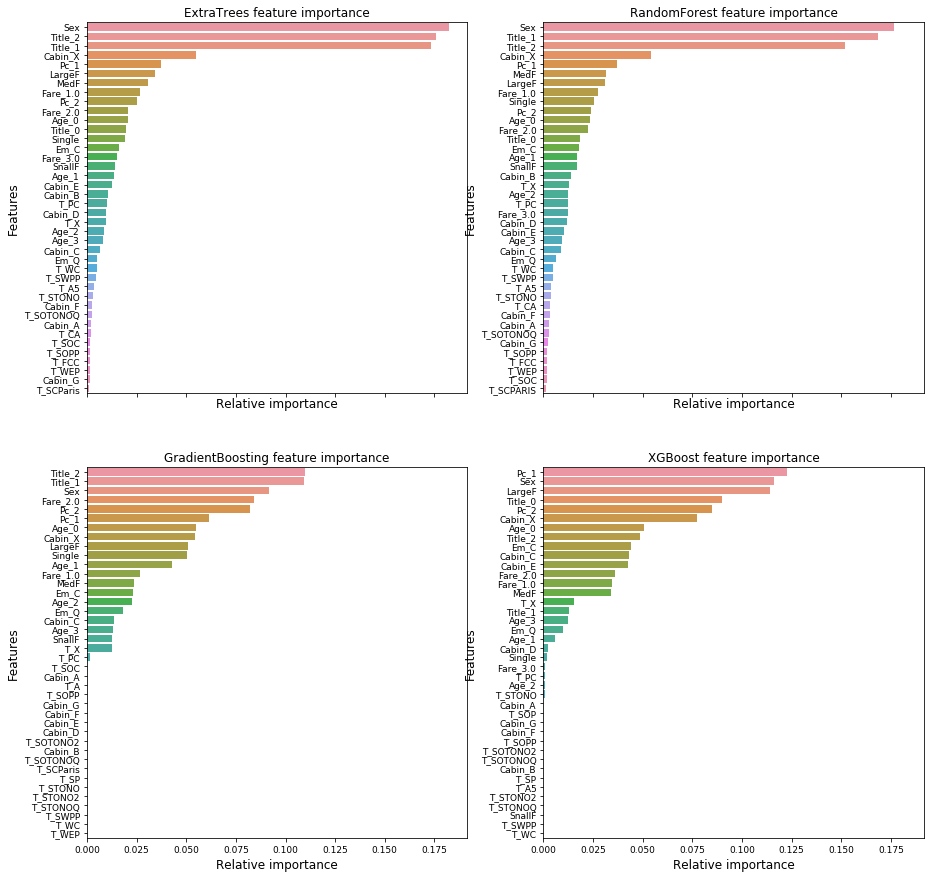

In [87]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("ExtraTrees",EXT_best_est),("RandomForest",RFC_best_est),("GradientBoosting",GBC_best_est),("XGBoost", gridxgb_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

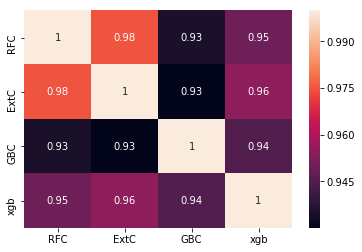

In [88]:
test_Survived_RFC = pd.Series(RFC_best_est.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(EXT_best_est.predict(test), name="ExtC")
test_Survived_GBC = pd.Series(GBC_best_est.predict(test), name="GBC")
test_Survived_xgb = pd.Series(gridxgb_best.predict(test), name="xgb")

# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_GBC, test_Survived_xgb],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

# 多种模型集成方法

## Voting

In [89]:
from sklearn.ensemble import VotingClassifier, \
AdaBoostClassifier

votingC = VotingClassifier(estimators=[('rfc', RFC_best_est), ('extc', EXT_best_est), \
                                       ('gbc', GBC_best_est), ('xgb', gridxgb_best)], voting='soft', n_jobs=-1)
votingC = votingC.fit(X_train, Y_train)

In [90]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")
results_votingC = pd.concat([IDtest, test_Survived], axis=1)
results_votingC.to_csv("ensemble_python_voting.csv", index=False)

## Stacking

In [91]:
#第一层
class Ensemble_stacking1(object):
    def __init__(self, n_folds, base_models):
        self.n_folds = n_folds
        self.base_models = base_models
    def get_data_to2(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)
        folds = StratifiedKFold(n_splits=self.n_folds, shuffle=True, random_state=2016).split(X,y)
        S_train = np.zeros((X.shape[0], len(self.base_models)))
        S_test = np.zeros((T.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):
            S_test_i = np.zeros((T.shape[0], self.n_folds))
            for j, (train_idx, test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                # y_holdout = y[test_idx]
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_holdout)[:]
                S_train[test_idx, i] = y_pred
                S_test_i[:, j] = clf.predict(T)[:]
            S_test[:, i] = S_test_i.mean(1)
        return S_train, S_test

#第二层
xgb2_param_grid = {"learning_rate": [0.01,0.5],
                  "n_estimators" : [300,500],
              "gamma": [0.1, 0.5,1.0],
              "max_depth": [3, 5, 10],
              "min_child_weight": [1, 3 , 5, 7],
              "subsample" : [0.8,1.0],
                 "colsample_bytree" : [0.6,0.8]}


gridxgb2 = GridSearchCV(XGBClassifier(),param_grid = xgb2_param_grid, cv=5, scoring="accuracy", n_jobs= -1, verbose = 1)


S_train, S_test = Ensemble_stacking1(5, [RFC_best_est,  EXT_best_est, GBC_best_est, gridxgb]).get_data_to2(X_train, Y_train, test)
gridxgb2.fit(S_train,Y_train)

gridxgb2_best = gridxgb2.best_estimator_
print(gridxgb2.best_score_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1456 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 2356 tasks      | elapsed:   11.1s


0.829738933031


[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:   13.7s finished


In [92]:
test_Survived = pd.Series(gridxgb2.predict(S_test), name="Survived")

results_stacking = pd.concat([IDtest,test_Survived],axis=1)

results_stacking.to_csv("ensemble_python_stacking.csv",index=False)